#  *** Predicting Car price using LR model  


In [15]:
# import the necessary libraries

In [1]:
from numpy import *
from pandas import *
import matplotlib.pyplot as plt
import seaborn as sns

## ** Reading and understanding of data

In [4]:
cars=read_csv("C:/Users/sai/OneDrive/Documents/dataset/cars_dataset.csv")
cars

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
72430,I30,2016,8680,Manual,25906,Diesel,0.0,78.4,1.6,Hyundai
72431,I40,2015,7830,Manual,59508,Diesel,30.0,65.7,1.7,Hyundai
72432,I10,2017,6830,Manual,13810,Petrol,20.0,60.1,1.0,Hyundai
72433,Tucson,2018,13994,Manual,23313,Petrol,145.0,44.8,1.6,Hyundai


In [5]:
cars.shape

(72435, 10)

In [6]:
cars.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi


In [7]:
cars.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
72430,I30,2016,8680,Manual,25906,Diesel,0.0,78.4,1.6,Hyundai
72431,I40,2015,7830,Manual,59508,Diesel,30.0,65.7,1.7,Hyundai
72432,I10,2017,6830,Manual,13810,Petrol,20.0,60.1,1.0,Hyundai
72433,Tucson,2018,13994,Manual,23313,Petrol,145.0,44.8,1.6,Hyundai
72434,Tucson,2016,15999,Automatic,11472,Diesel,125.0,57.6,1.7,Hyundai


In [8]:
cars.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'Make'],
      dtype='object')

In [9]:
cars.describe()

,year,price,mileage,tax,mpg,engineSize
count,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000
mean,2017.073666,16580.158708,23176.517057,116.953407,55.852480,1.635650
std,2.101252,9299.028754,21331.515562,64.045533,17.114391,0.561535
min,1996.000000,495.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10175.000000,7202.500000,30.000000,47.900000,1.200000
50%,2017.000000,14495.000000,17531.000000,145.000000,55.400000,1.600000
75%,2019.000000,20361.000000,32449.000000,145.000000,62.800000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,470.800000,6.600000


In [10]:
cars.info

<bound method DataFrame.info of          model  year  price transmission  mileage fuelType    tax   mpg  \
0           A1  2017  12500       Manual    15735   Petrol  150.0  55.4   
1           A6  2016  16500    Automatic    36203   Diesel   20.0  64.2   
2           A1  2016  11000       Manual    29946   Petrol   30.0  55.4   
3           A4  2017  16800    Automatic    25952   Diesel  145.0  67.3   
4           A3  2019  17300       Manual     1998   Petrol  145.0  49.6   
...        ...   ...    ...          ...      ...      ...    ...   ...   
72430      I30  2016   8680       Manual    25906   Diesel    0.0  78.4   
72431      I40  2015   7830       Manual    59508   Diesel   30.0  65.7   
72432      I10  2017   6830       Manual    13810   Petrol   20.0  60.1   
72433   Tucson  2018  13994       Manual    23313   Petrol  145.0  44.8   
72434   Tucson  2016  15999    Automatic    11472   Diesel  125.0  57.6   

       engineSize     Make  
0             1.4     audi  
1        

## ** Data Preprocessing

### * Data Cleaning

In [11]:
cars.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Make            0
dtype: int64

In [12]:
# rename make coloumn  to company name column

cars.rename(columns={"Make":"Company_name"},inplace=True)

In [13]:
# check the dataset contains duplicate values

cars.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
72430    False
72431    False
72432    False
72433    False
72434    False
Length: 72435, dtype: bool

In [14]:
cars.duplicated().sum()

842

In [15]:
cars.shape

(72435, 10)

In [16]:
# remove the duplicate values from the dataset 

cars.drop_duplicates(inplace=True)

In [17]:
cars.shape

(71593, 10)

## ** Exploratory Data  Analysis

In [18]:
# find how the data is distributed between the columns using exploration analysis process

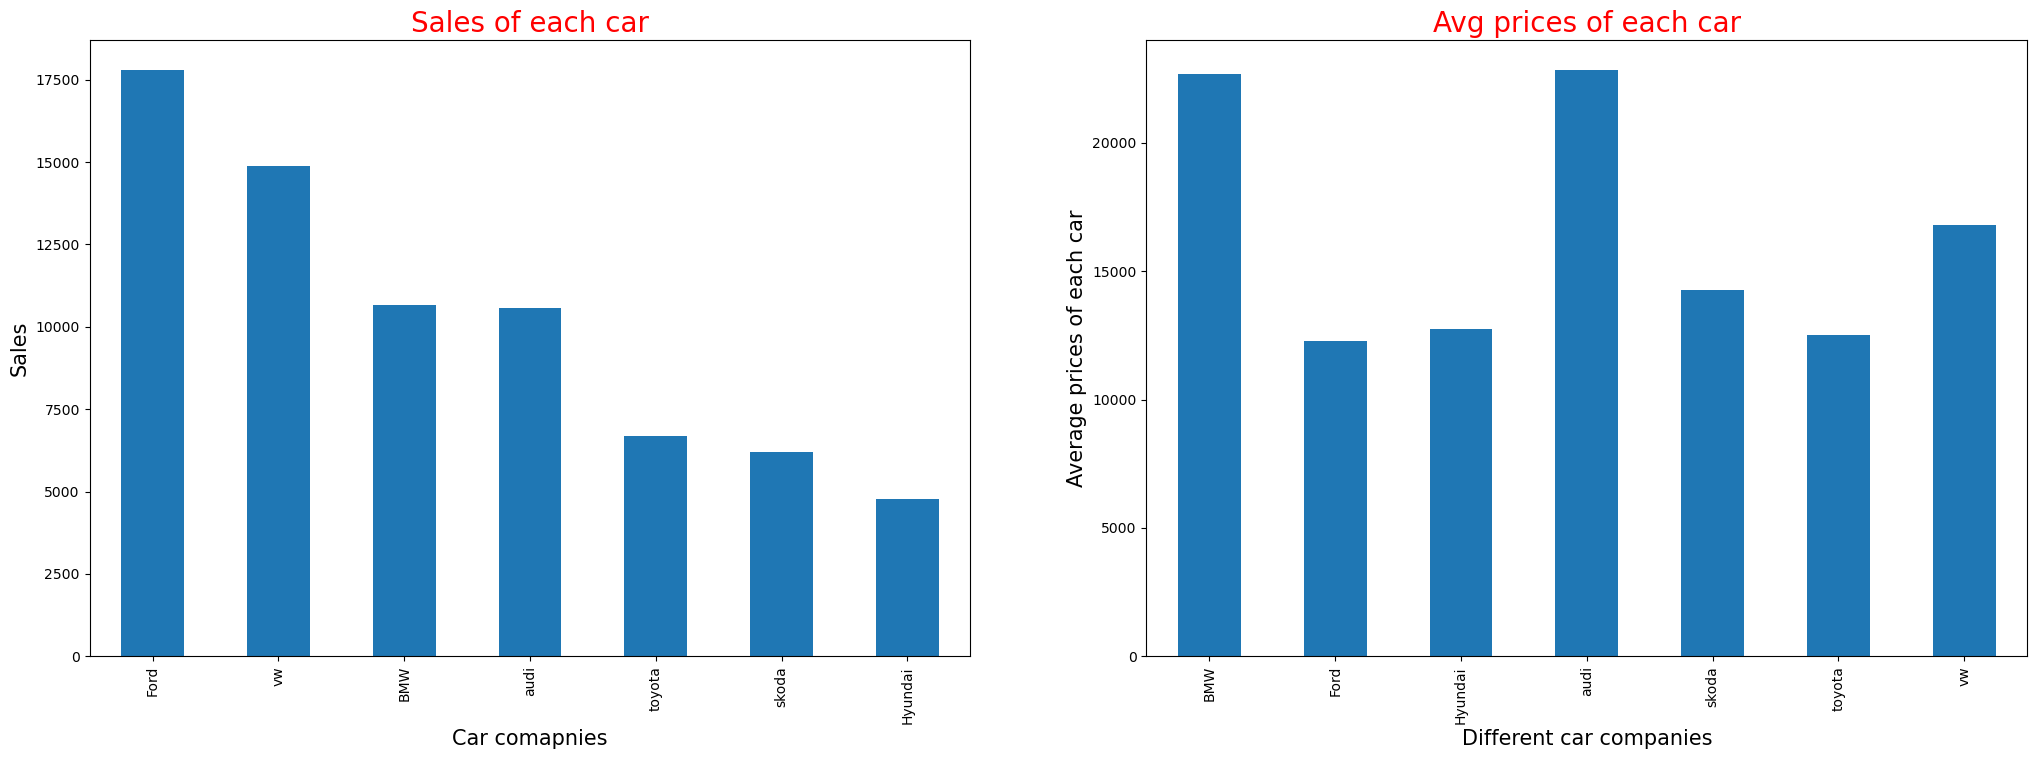

In [19]:
plt.figure(figsize=(25,8))

# sales of each car

plt.subplot(1,2,1)
cars['Company_name'].value_counts().plot(kind='bar')
plt.xlabel('Car comapnies',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.title('Sales of each car',fontsize=20,color='red')

# Average prices of each car 

plt.subplot(1,2,2)
cars.groupby("Company_name")['price'].mean().plot(kind='bar')
plt.xlabel("Different car companies",fontsize=15)
plt.ylabel("Average prices of each car",fontsize=15)
plt.title("Avg prices of each car",fontsize=20,color="red")

plt.show()

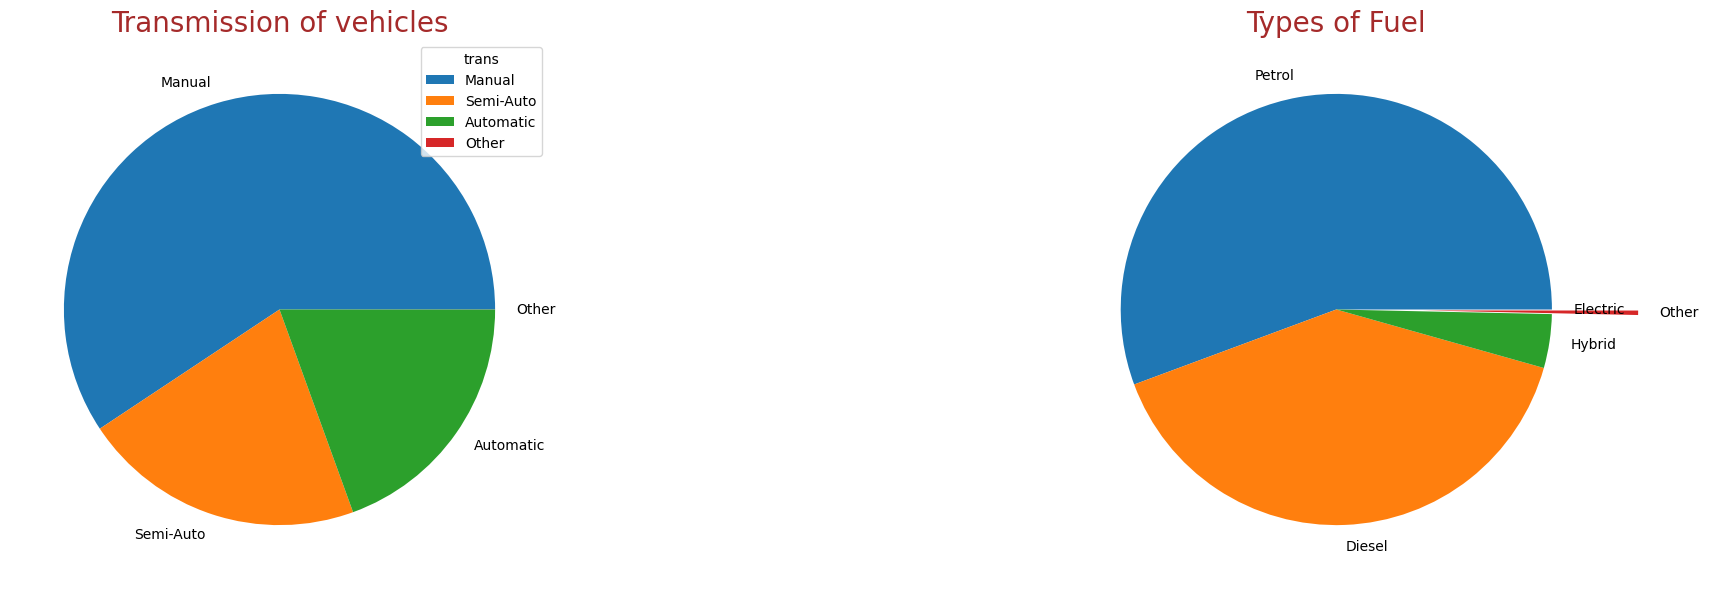

In [20]:
plt.figure(figsize=(25,7))

# transmission

plt.subplot(1,2,1)
x=cars.transmission.value_counts()
y=x.index
plt.pie(x,labels=y)
plt.title("Transmission of vehicles",fontsize=20,color='brown')
plt.legend(title="trans")

plt.subplot(1,2,2)
x=cars.fuelType.value_counts()
lab=x.index
plt.pie(x,labels=lab,explode=[0,0,0,0.4,0])
plt.title("Types of Fuel",fontsize=20,color="brown")
plt.show()

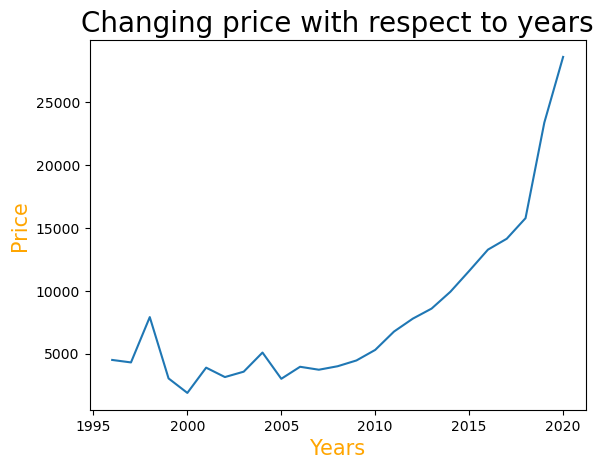

In [21]:
# changing the car price with respect to change in years

year_price=cars.groupby('year')['price'].mean()
pr_x=year_price.index
pr_y=year_price.values
plt.plot(pr_x,pr_y)
plt.xlabel("Years",fontsize=15,color="orange")
plt.ylabel("Price",fontsize=15,color="orange")
plt.title("Changing price with respect to years",fontsize=20,color="black")
plt.show()

## ** Feature Engineering

###  * Encoding the data 

In [22]:
# Converting the string values into model understable numeric format

cars.replace({'transmission':{'Manual':0,'Automatic':1,'Semi-Auto':2,'Other':3}},inplace=True)
cars.replace({'fuelType':{'Petrol':0, 'Diesel':1, 'Hybrid':2, 'Other':3, 'Electric':4}},inplace=True)
cars.replace({'Company_name':{'audi':0,'BMW':1,'Ford':2,'vw':3,'toyota':4, 'skoda':5, 'Hyundai':6}},inplace=True)
cars

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Company_name
0,A1,2017,12500,0,15735,0,150.0,55.4,1.4,0
1,A6,2016,16500,1,36203,1,20.0,64.2,2.0,0
2,A1,2016,11000,0,29946,0,30.0,55.4,1.4,0
3,A4,2017,16800,1,25952,1,145.0,67.3,2.0,0
4,A3,2019,17300,0,1998,0,145.0,49.6,1.0,0
...,...,...,...,...,...,...,...,...,...,...
72430,I30,2016,8680,0,25906,1,0.0,78.4,1.6,6
72431,I40,2015,7830,0,59508,1,30.0,65.7,1.7,6
72432,I10,2017,6830,0,13810,0,20.0,60.1,1.0,6
72433,Tucson,2018,13994,0,23313,0,145.0,44.8,1.6,6


In [24]:
cars['fuel_efficency']=cars.mileage//cars.mpg


In [25]:
cars

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Company_name,fuel_efficency
0,A1,2017,12500,0,15735,0,150.0,55.4,1.4,0,284.0
1,A6,2016,16500,1,36203,1,20.0,64.2,2.0,0,563.0
2,A1,2016,11000,0,29946,0,30.0,55.4,1.4,0,540.0
3,A4,2017,16800,1,25952,1,145.0,67.3,2.0,0,385.0
4,A3,2019,17300,0,1998,0,145.0,49.6,1.0,0,40.0
...,...,...,...,...,...,...,...,...,...,...,...
72430,I30,2016,8680,0,25906,1,0.0,78.4,1.6,6,330.0
72431,I40,2015,7830,0,59508,1,30.0,65.7,1.7,6,905.0
72432,I10,2017,6830,0,13810,0,20.0,60.1,1.0,6,229.0
72433,Tucson,2018,13994,0,23313,0,145.0,44.8,1.6,6,520.0


### ** Model training

In [26]:
x=cars.drop(['model','price'],axis=1)
x

,year,transmission,mileage,fuelType,tax,mpg,engineSize,Company_name,fuel_efficency
0,2017,0,15735,0,150.0,55.4,1.4,0,284.0
1,2016,1,36203,1,20.0,64.2,2.0,0,563.0
2,2016,0,29946,0,30.0,55.4,1.4,0,540.0
3,2017,1,25952,1,145.0,67.3,2.0,0,385.0
4,2019,0,1998,0,145.0,49.6,1.0,0,40.0
...,...,...,...,...,...,...,...,...,...
72430,2016,0,25906,1,0.0,78.4,1.6,6,330.0
72431,2015,0,59508,1,30.0,65.7,1.7,6,905.0
72432,2017,0,13810,0,20.0,60.1,1.0,6,229.0
72433,2018,0,23313,0,145.0,44.8,1.6,6,520.0


In [27]:
y=cars.price
y

0        12500
1        16500
2        11000
3        16800
4        17300
         ...  
72430     8680
72431     7830
72432     6830
72433    13994
72434    15999
Name: price, Length: 71593, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# splitting the data into training and testing to train the model 

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=2)

In [30]:
print(x_train.shape)
print(x_test.shape)

# In the 100 percent of the data 80 percent data is divided for training data and the 
#remaining 20 percent is for testing data

(53694, 9)
(17899, 9)


### * Standardization of data

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
# the standardization is for to get the total data into the particular interval

In [33]:
sc=StandardScaler()

In [34]:
sc.fit(x_train)

StandardScaler()

In [35]:
x_train_stand=sc.transform(x_train)

print(x_train_stand)

# In these each one dimensional array indicates each row and the total values is
#standarded into particular interval

[[-3.84323829 -0.7611334   2.65656701 ...  0.64735556  0.30519849
   4.23214318]
 [ 0.92067335 -0.7611334  -1.09089715 ... -1.1345963   2.05697952
  -1.02382998]
 [ 0.92067335  0.46972817 -0.9370346  ...  2.42930741 -0.86265553
  -0.82290233]
 ...
 [-0.03210898 -0.7611334   0.21087581 ... -0.06542519 -0.27872852
   0.39246489]
 [ 1.39706451 -0.7611334  -1.01002068 ... -1.1345963  -0.27872852
  -0.94786953]
 [-0.50850015 -0.7611334   1.23700185 ...  0.64735556  0.30519849
   0.73796242]]


In [36]:
x_test_stand=sc.transform(x_test)
x_test_stand

array([[-0.50850015,  0.46972817, -0.50822964, ..., -1.1345963 ,
        -0.27872852, -0.43329873],
       [ 0.44428218, -0.7611334 , -0.12418384, ...,  0.64735556,
         0.30519849,  0.11802713],
       [-0.03210898, -0.7611334 , -0.9960716 , ..., -1.1345963 ,
         0.30519849, -0.94051851],
       ...,
       [-0.03210898,  1.70058974, -0.65969689, ...,  0.11277   ,
         2.05697952, -0.63422637],
       [ 1.39706451,  1.70058974, -0.90500339, ...,  2.42930741,
        -0.86265553, -0.7346902 ],
       [ 0.92067335,  0.46972817, -0.90350046, ...,  2.42930741,
        -1.44658255, -0.73223986]])

##  ** Apply Linear Regression model

In [37]:
# for applying linear or any model first we create the model

###  * Creating Linear Regression model

In [39]:
from numpy import *


class Linear_Regression():
    
    # this function to intialise the hyper parameter values
    
    def __init__(self,learning_rate,no_of_iterations):
        
        self.learning_rate=learning_rate
        
        self.no_of_iterations=no_of_iterations
        
    
   
   # this function to intialise model parameter values
    
    def fit(self,x,y):
        
        # it gives the m value as no.of trainning examples and n value as features of the data
        
        self.m,self.n=x.shape
        
        # intialise model parameters are weight and bias values
        
        # the weight consists of multiple features so it is an array
       
        self.w=zeros(self.n)
        
        # the bias consists only one feature so the value is an scalar
        
        self.b=0
        
        self.x=x
        
        self.y=y
        
       
      
        # Implementing the gradient descent
        
        for i in range(self.no_of_iterations):
            
            self.update_weights()
            
   
   
    # updating weights from iteration to iteration
    
    def update_weights(self):
        
        # the y_prediction stores the predicted values for that weights and bias
        
        y_prediction=self.predict(self.x)
        
        # formula for differentiating weight    dw=[-2(summation(xi(yi-y_pred)))/n]
        
        dw=-(2*(self.x.T).dot(self.y-y_prediction))/self.m
        
        # formula for differentiating bias     db=[-2(summation(yi-y_pred))/n]   
        
        db=-2*sum(self.y-y_prediction)/self.m
        
        # updating weights and bias
       
        self.w=self.w-(self.learning_rate*dw)   # [ w = w - lr * dw ]
        
        self.b=self.b-(self.learning_rate*db)   # [ b = b- lr * db ]
        
   
    
    # predicting the y values to respect to x 
    
    def predict(self,x):
        
        # it is done on the formulae [y=w*x+b]
        
        return x.dot(self.w)+self.b

###  * Training the linear model

In [40]:
# load the linear model (lerning rate is magnitude of change)

model=Linear_Regression(learning_rate=0.06,no_of_iterations=1000)

In [41]:
# fitting the data to the model

model.fit(x_train_stand,y_train)

In [42]:
model.b

16559.71400901395

In [43]:
model.w[0]

3376.267963475859

### * Predict the car price for the test data

In [44]:
x_test.shape

(17899, 9)

In [45]:
test_data_predict=model.predict(x_test_stand)
test_data_predict

array([11255.28857898, 20480.51399136, 11064.14271219, ...,
       17815.33454677, 39154.81293672, 36708.75165061])

In [46]:

from sklearn.metrics import r2_score

# Calculate R-squared score
r2 = r2_score(y_test, test_data_predict)
print("r socre",r2)

r socre 0.7532728575900067
